# Chapter 4 - SARIMAX

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

In [4]:
url1 = ('https://raw.githubusercontent.com/Apress/hands-on-time-series-analylsis-python/refs/heads/master/Data/FB.csv')
df = pd.read_csv(url1)

df['date'] = pd.to_datetime(df['Date'])    # Ensure it's in datetime format
df = df.set_index('date')                  # Set as index
df = df.sort_index()                       # Sort the index chronologically
df.drop(columns='Date', inplace=True)      # Drop 'Date' column if still present
df.head()

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


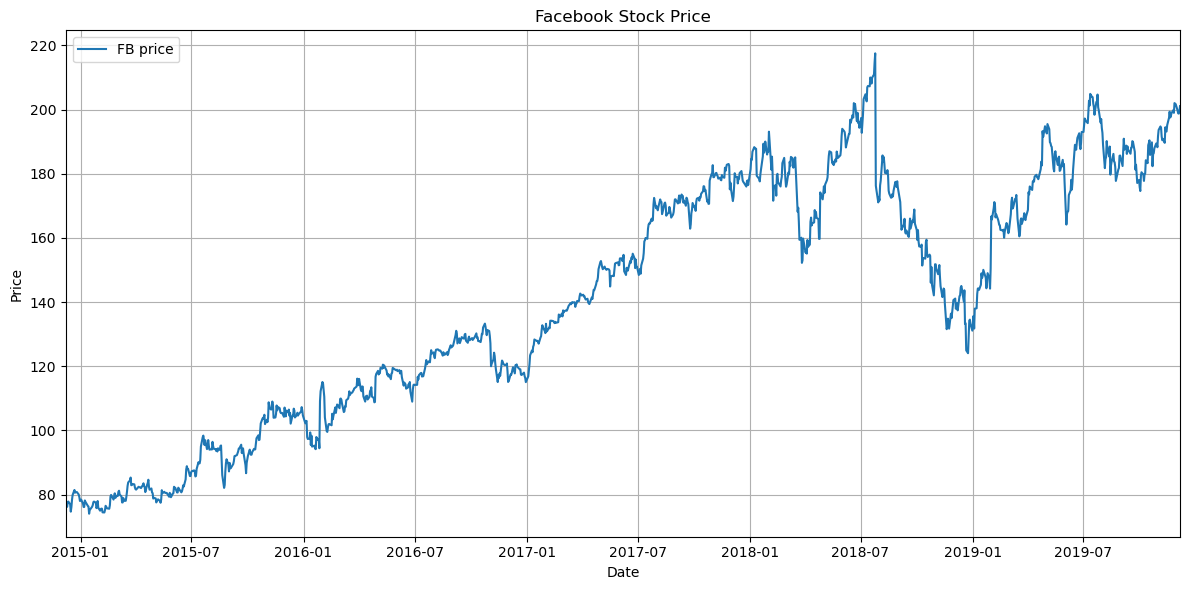

In [5]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['Close'], label='FB price')     

plt.title('Facebook Stock Price')                      
plt.xlabel('Date')                                        
plt.ylabel('Price')  
plt.xlim(pd.to_datetime('2014-12-08'), pd.to_datetime('2019-12-06'))
plt.grid(True)                                            
plt.legend(loc=2)                                             
plt.tight_layout()                                       
plt.show()